In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


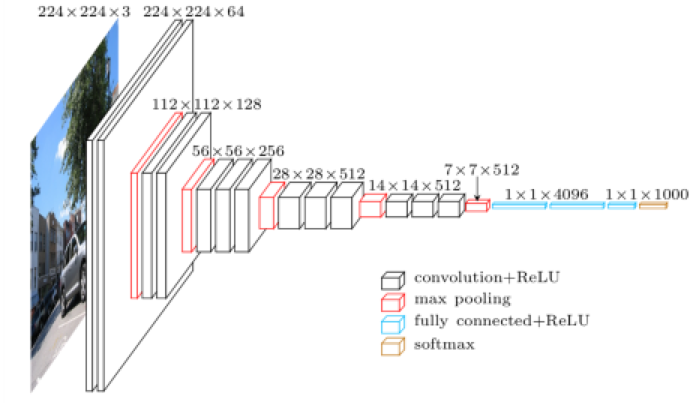

VGG16 model, with weights pre-trained on ImageNet.

This model is available for both the Theano and TensorFlow backend, and can be built both with "channels_first" data format (channels, height, width) or "channels_last" data format (height, width, channels).

The default input size for this model is 224x224.

It's important to understand the data that Vgg16 is built on. Most of these images are of single objects. What this means is that Vgg16 is best applied in circumstances where the images are primarily of one object, such as our cats and dogs images. It's essential when using a pre-trained model to explore the data it was trained on so you can understand it's limits and bias. 

In [2]:
# instantiate layer and load imagenet weights
# include_top: whether to include the 3 fully-connected layers at the top of the network.
# model.layers.pop() remove last layer - to allow for retraining...

model = VGG16(weights='imagenet', include_top=True)
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# for layer in model.layers:
#    print layer.name

In [3]:
#
# set existing layers so that the entire model is not retrained
#
for l in model.layers:
    l.trainable =False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# create new layer 2 dimensions with softmax activation function.

#import math
#z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
#z_exp = [math.exp(i) for i in z]  
#print(z_exp)  # Result: [2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09] 
#sum_z_exp = sum(z_exp)  
#print(sum_z_exp)  # Result: 114.98 
#softmax = [round(i / sum_z_exp, 3) for i in z_exp]
#print(softmax)  # Result: [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

# lr - 0,001 - learning rate


As detailed above, a neural network is at it's core a sequence of matrices that map an input vector to an output vector through matrix multiplication. The intermediate vectors in between each matrix are the activations, and the matrices themselves are the layers. Through a process we'll learn about called "fitting", our goal is to adjust the values of the matrices, which we call "weights", so that when our input vectors are passed into the neural network we are able to produce an output vector that is as close as possible to the true output vector, and we do this across multiple labeled input vectors. This is what makes up a training set. 


Standard gradient descent is a method of iteratively selecting "parameters" (what we call weights in deep learning) that successively minimize what is known as a "loss function." The loss function is simply some method of determining how different the predicted output, as determined by prediction "parameters" and given input, are from the true output associated with the same inputs. A common loss function is sum of square errors, which is simply the sum of squares of the difference between predicted responses and true responses. This loss function is common in processes like linear regression. Another common loss function is the log-loss, which we have defined above. We commonly use this loss function in neural networks.

Since our loss function is essentially a measure of how well our predictions match with the expected values, the goal of our optimization algorithm is to minimize this value. Our prediction function has at a minimum two kinds of numerical values, the inputs that the function acts upon, and the "parameters" that dictate what we do to the input. Since we cannot change the inputs, we necessarily must minimize the loss function by choosing parameters that produce predictions that are closer to the expected values. 

In [4]:
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

new_layer = Dense(2, activation='softmax', name='my_dense')

inp = model.input
out = new_layer(model.layers[-1].output)

model2 = Model(inp, out)
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [98]:
# based on sample dataset build training data
#
#
#

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/lesson1/data/redux/sample/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 200 images belonging to 2 classes.


In [6]:
train_generator


In [7]:
model2.optimizer.lr

In [22]:
# based on sample dataset build validation data
#


test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/lesson1/data/redux/sample/valid',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')

# Train model with training and validation data.
#

model2.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=100)

Found 50 images belonging to 2 classes.
Epoch 1/5
200/200 [==============================] - 120s - loss: 0.3746 - acc: 0.8269 - val_loss: 0.3384 - val_acc: 0.8600
Epoch 2/5
200/200 [==============================] - 120s - loss: 0.3984 - acc: 0.8131 - val_loss: 0.2601 - val_acc: 0.8800
Epoch 3/5
200/200 [==============================] - 137s - loss: 0.3428 - acc: 0.8525 - val_loss: 0.2783 - val_acc: 0.9000
Epoch 4/5
200/200 [==============================] - 120s - loss: 0.3215 - acc: 0.8625 - val_loss: 0.5670 - val_acc: 0.7608
Epoch 5/5
200/200 [==============================] - 120s - loss: 0.3406 - acc: 0.8506 - val_loss: 0.2552 - val_acc: 0.8400


training loss and accuracy and validation loss and accuracy

The lower the Loss, the better a model (unless the model has over-fitted to the training data). The loss is calculated on training and validation and its interperation is how well the model is doing for these two sets. Loss is not in percentage as opposed to accuracy and it is a summation of the errors made for each example in training or validation sets. In the case of neural networks the loss is usually negative log-likelihood and residual sum of squares for classification and regression respectively. Then naturally, the main objective in a learning model is to reduce (minimize) the loss function's value with respect to the model's parameters by changing the weight vector values through different optimization methods, such as backpropagation in neural networks. Loss value implies how well or bad a certain model is behaving after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s). The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated. For example, if the number of test samples is 1000 and model classifies 952 of those correctly, then the model's accuracy is reported as 95.2%.

In [74]:
# model2.load_weights('/home/ubuntu/lesson1/weights/ft2_sample.h5')
model2.save_weights('/home/ubuntu/lesson1/weights/ft2_sample.h5')

In [9]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
#for l in model2.layers:
#    if l.name == 'fc2':
#        l.trainable = True
#    else:
#        l.trainable =False

In [15]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [75]:
# train model using the full training and validation data

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=15, 
        width_shift_range=0.1,                         
        height_shift_range=0.1, 
        zoom_range=0.1, 
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/lesson1/data/redux/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/lesson1/data/redux/valid',
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical')

model2.fit_generator(
        train_generator,
        steps_per_epoch=160,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=40)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
160/160 [==============================] - 198s - loss: 0.2842 - acc: 0.8789 - val_loss: 0.1936 - val_acc: 0.9250
Epoch 2/5
160/160 [==============================] - 187s - loss: 0.2788 - acc: 0.8816 - val_loss: 0.2321 - val_acc: 0.8906
Epoch 3/5
160/160 [==============================] - 188s - loss: 0.2710 - acc: 0.8877 - val_loss: 0.2753 - val_acc: 0.8844
Epoch 4/5
160/160 [==============================] - 187s - loss: 0.2530 - acc: 0.8924 - val_loss: 0.2104 - val_acc: 0.9000
Epoch 5/5
160/160 [==============================] - 196s - loss: 0.2706 - acc: 0.8805 - val_loss: 0.2103 - val_acc: 0.9281


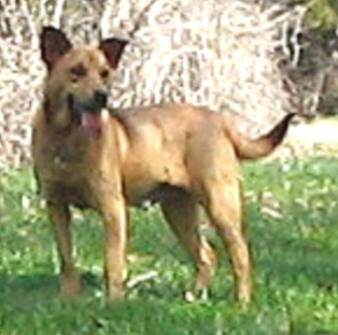

In [101]:
# lets start looking at the test data to predict.

import glob
from IPython.display import display, Image
from keras.preprocessing import image as kimage
import skimage.io

img_dir = '/home/ubuntu/lesson1/data/redux/test1/unknown'
rand_img = np.random.choice(glob.glob(img_dir + '/*.jpg'))
Image(filename=rand_img)


In [77]:
# Load in the data to predict.
#

real_test_gen = test_datagen.flow_from_directory(
        '/home/ubuntu/lesson1/data/redux/test1',
        target_size=(224, 224),
        batch_size=10,
        shuffle=False,
        class_mode=None)

Found 12500 images belonging to 1 classes.


In [104]:
# predict 
# batch size infuences speed not accuracy
#
test_pred_all = model2.predict_generator(real_test_gen,1250, verbose=1)
files = np.array([real_test_gen.filenames]).T
all_preds = np.hstack((np.round(test_pred_all,decimals=3), files))

1250/1250 [==============================] - 556s   


In [102]:
test_pred_all
test_pred_all.shape


(12500, 2)

In [80]:
real_test_gen.filenames[0:2], test_pred_all[0:2]

(['unknown/10438.jpg', 'unknown/12309.jpg'], array([[ 0.12609735,  0.87390262],
        [ 0.65624744,  0.34375259]], dtype=float32))

In [81]:
real_test_gen.filenames

['unknown/10438.jpg',
 'unknown/12309.jpg',
 'unknown/10240.jpg',
 'unknown/10851.jpg',
 'unknown/11269.jpg',
 'unknown/5698.jpg',
 'unknown/5273.jpg',
 'unknown/12445.jpg',
 'unknown/7626.jpg',
 'unknown/7692.jpg',
 'unknown/871.jpg',
 'unknown/1846.jpg',
 'unknown/9165.jpg',
 'unknown/4335.jpg',
 'unknown/796.jpg',
 'unknown/8408.jpg',
 'unknown/2771.jpg',
 'unknown/7299.jpg',
 'unknown/8955.jpg',
 'unknown/7932.jpg',
 'unknown/2168.jpg',
 'unknown/6378.jpg',
 'unknown/9689.jpg',
 'unknown/10669.jpg',
 'unknown/2510.jpg',
 'unknown/6768.jpg',
 'unknown/11827.jpg',
 'unknown/716.jpg',
 'unknown/1938.jpg',
 'unknown/10105.jpg',
 'unknown/8891.jpg',
 'unknown/384.jpg',
 'unknown/11125.jpg',
 'unknown/9082.jpg',
 'unknown/2574.jpg',
 'unknown/12377.jpg',
 'unknown/377.jpg',
 'unknown/3190.jpg',
 'unknown/11923.jpg',
 'unknown/8267.jpg',
 'unknown/942.jpg',
 'unknown/4522.jpg',
 'unknown/4411.jpg',
 'unknown/220.jpg',
 'unknown/7973.jpg',
 'unknown/9762.jpg',
 'unknown/1970.jpg',
 'unknow

In [82]:
test_pred_all

array([[  1.26097351e-01,   8.73902619e-01],
       [  6.56247437e-01,   3.43752593e-01],
       [  9.99993682e-01,   6.37370294e-06],
       ..., 
       [  9.82342303e-01,   1.76576339e-02],
       [  6.85118139e-01,   3.14881861e-01],
       [  9.83730018e-01,   1.62699725e-02]], dtype=float32)

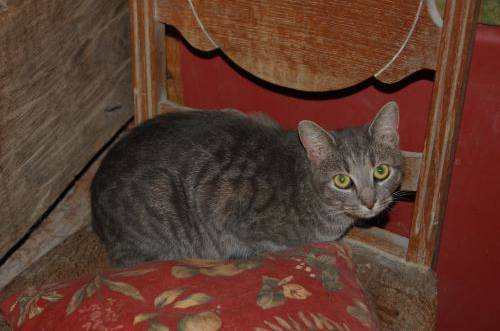

In [83]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/12309.jpg'
Image(filename=img_path)

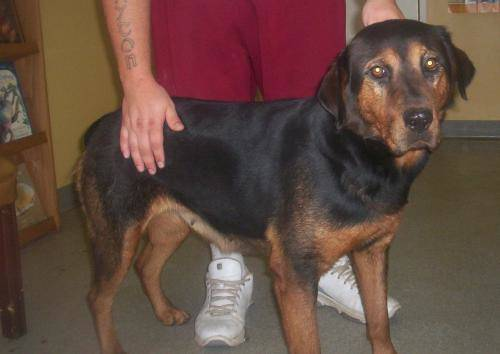

In [84]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/10438.jpg'
Image(filename=img_path)

In [85]:
all_preds[:,1]

array(['0.874000012875', '0.344000011683', '0.0', ..., '0.0179999992251',
       '0.314999997616', '0.01600000076'], 
      dtype='|S32')

In [86]:
all_preds

array([['0.126000002027', '0.874000012875', 'unknown/10438.jpg'],
       ['0.65600001812', '0.344000011683', 'unknown/12309.jpg'],
       ['1.0', '0.0', 'unknown/10240.jpg'],
       ..., 
       ['0.981999993324', '0.0179999992251', 'unknown/7979.jpg'],
       ['0.685000002384', '0.314999997616', 'unknown/10148.jpg'],
       ['0.98400002718', '0.01600000076', 'unknown/10582.jpg']], 
      dtype='|S32')

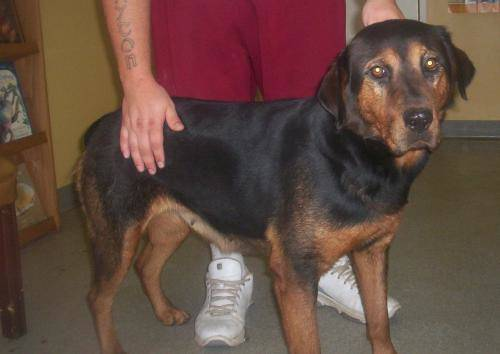

In [109]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/10438.jpg'
Image(filename=img_path)

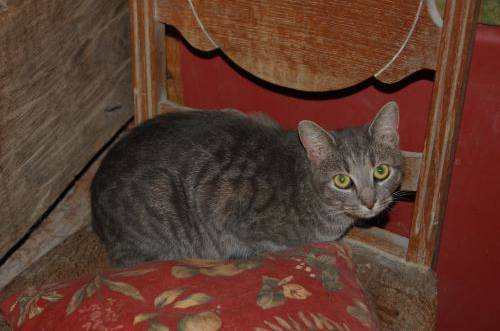

In [110]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/12309.jpg'
Image(filename=img_path)

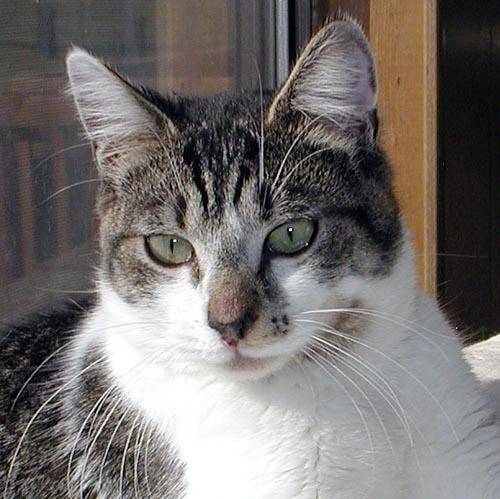

In [111]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/10240.jpg'
Image(filename=img_path)

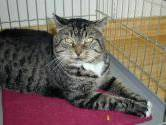

In [108]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/7979.jpg'
Image(filename=img_path)

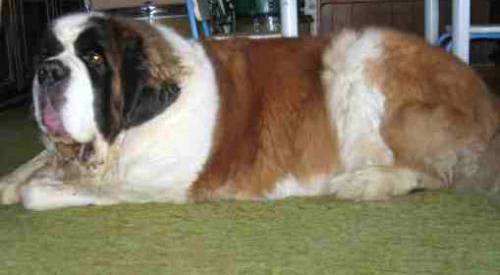

In [106]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/10148.jpg'
Image(filename=img_path)

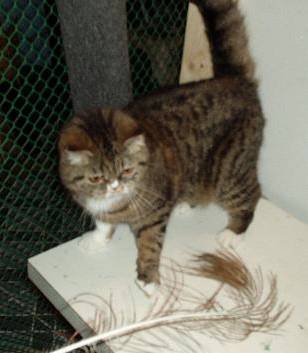

In [105]:
img_path = '/home/ubuntu/lesson1/data/redux/test1/unknown/10582.jpg'
Image(filename=img_path)

In [88]:
# isdog.clip(min=0.02, max=0.98)
isdog = test_pred_all[:,1]
print isdog


[  8.73902619e-01   3.43752593e-01   6.37370294e-06 ...,   1.76576339e-02
   3.14881861e-01   1.62699725e-02]


In [89]:
isdog = np.clip(isdog, 0.02, 0.98, out=isdog)
print isdog

[ 0.87390262  0.34375259  0.02       ...,  0.02        0.31488186  0.02      ]


In [93]:
isdog.shape

(12500,)

In [94]:
filenames = real_test_gen.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [95]:
subm = np.stack([ids,isdog], axis=1)
subm[:6]

array([[  1.04380000e+04,   8.73902619e-01],
       [  1.23090000e+04,   3.43752593e-01],
       [  1.02400000e+04,   1.99999996e-02],
       [  1.08510000e+04,   9.80000019e-01],
       [  1.12690000e+04,   9.80000019e-01],
       [  5.69800000e+03,   9.80000019e-01]])

In [96]:
%cd /home/ubuntu/lesson1/output

submission_file_name = 'vgg16b.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/lesson1/output


In [97]:
from IPython.display import FileLink
FileLink('/home/ubuntu/lesson1/output/'+submission_file_name)

/home/ubuntu/lesson1/output/vgg16b.csv